# Temporal Difference Learning Methods for Control

## Sarsa: GPI with TD

### The Sarsa algorithm

- Sarsa

$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha (R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t))
$$

- Recall: TD

$$
V(S_t) \leftarrow V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t))
$$

- We can combine *generalized policy iteration* with *TD learning* to find *improved policies*
- *Sarsa* is an *action-value* form of TD which combines these ideas


## Example: Windy Gridworld



In [2]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

START = [3, 0]
GOAL = [3, 7]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

# play for an episode
def episode(q_value):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

        # Sarsa update
        q_value[state[0], state[1], action] += \
            ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] -
                     q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    return time

Optimal policy is:
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'U', 'D']
['U', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'D']
['U', 'D', 'R', 'R', 'R', 'R', 'R', 'G', 'U', 'D']
['D', 'D', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'L']
['D', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


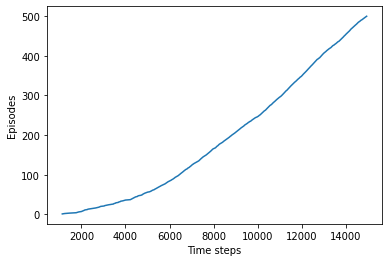

In [3]:
q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
episode_limit = 500

steps = []
ep = 0
while ep < episode_limit:
    steps.append(episode(q_value))
    # time = episode(q_value)
    # episodes.extend([ep] * time)
    ep += 1

steps = np.add.accumulate(steps)

plt.plot(steps, np.arange(1, len(steps) + 1))
plt.xlabel('Time steps')
plt.ylabel('Episodes')

# display the optimal policy
optimal_policy = []
for i in range(0, WORLD_HEIGHT):
    optimal_policy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == GOAL:
            optimal_policy[-1].append('G')
            continue
        bestAction = np.argmax(q_value[i, j, :])
        if bestAction == ACTION_UP:
            optimal_policy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimal_policy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimal_policy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimal_policy[-1].append('R')
print('Optimal policy is:')
for row in optimal_policy:
    print(row)
print('Wind strength for each column:\n{}'.format([str(w) for w in WIND]))

